In [1]:
from functions import *
from agent import *
from collaborate_rescue import *
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [2]:
# 求平均值与方差，in:list， out:mean,std
def get_mean_and_std(lst):
    return np.average(lst), np.std(lst)

# 求归一化信任，in:array，out:array
def get_trust(array):
    return (np.exp(array)-np.exp(-array))/(np.exp(array)+np.exp(-array))

# 信任图像（无论多少步，都为200个点），in:实验条件，out:图片
def plot_trust(delta, ita, w, method, s):
    results = []
    for i in range(10):
        result = collaborate_rescue_1(delta, ita, w, method, s)
        plt.yticks([0, 0.25, 0.5, 0.75, 1])
        plt.plot(get_trust(result.human_trust)[[x*s/200 for x in range(200)]], linestyle='-')

# 获取绩效
def get_task_counts(delta, ita, w, method, s):
    results = []
    for i in tqdm(range(10)):
        result = collaborate_rescue_1(delta, ita, w, method, s)
        results.append(result)
    task_counts = [x.task_count.sum()/s for x in results]
    return task_counts
        
# 绩效图像
def plot_task_count(a, mi, ma):
    mi, me, ma = round(mi-0.05, 2), round((mi+ma)/2, 2), round(ma+0.05, 2)
    fig = plt.figure(figsize=(10, 7))
    plt.ylim(mi, ma)
    plt.xlim(0, 1)
    plt.xticks([0.2, 1.2, 1.9], ['低等信任', '高等信任', ''],fontsize=15)
    plt.yticks([mi, me, ma], [mi, me, ma], fontsize=15, rotation=90)
    plt.plot(a[0][:, 0], a[0][:, 1], '-.', marker='o')
    plt.plot(a[1][:, 0], a[1][:, 1], '-', marker='o')
    plt.plot(a[2][:, 0], a[2][:, 1], '--', marker='o')
    plt.plot(a[3][:, 0], a[3][:, 1], ':', marker='o')
    plt.ylabel('绩效', fontsize=15)
    plt.legend(['A 最优vs任务', 'B 最优vs适应', 'C 满意vs任务', 'D 满意vs适应'], loc='center right', fontsize=14)
    plt.show()

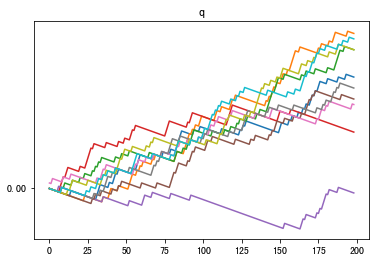

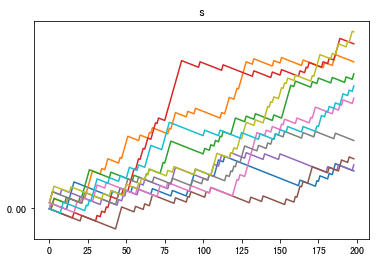

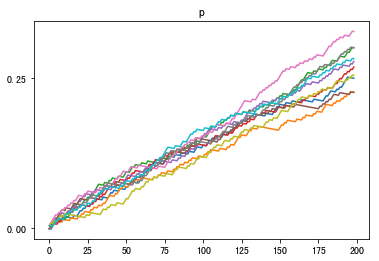

In [182]:
# 1. 不同算法对人类信任的影响
methods = ['q', 's', 'p']
for method in methods:
    plot_trust(0.5, 0.8, 0.5, method, 200)
    plt.title(method)
    plt.show()

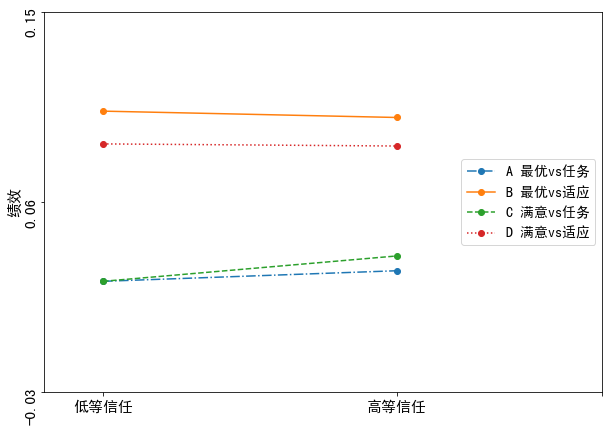

In [17]:
# 2. q的协作绩效
# 最优任务 最优适应 满意任务 满意适应

# 低等信任环境
delta = 0.8
mean1 = []
for ita, w in zip([0.8, 0.8, 0.2, 0.2], [1, 0.5, 1, 0.5]):
    lst = get_task_counts(delta, ita, w, 'q', 200)
    mean = get_mean_and_std(lst)[0]
    mean1.append(mean)
    
# 高等信任环境
delta = 0.2
mean2 = []
for ita, w in zip([0.8, 0.8, 0.2, 0.2], [1, 0.5, 1, 0.5]):
    lst = get_task_counts(delta, ita, w, 'q', 200)
    mean = get_mean_and_std(lst)[0]
    mean2.append(mean)

_1 = np.vstack([[0.2]*4, mean1]).T
_2 = np.vstack([[1.2]*4, mean2]).T
a = np.hstack([_1, _2]).reshape((4,2,2))
mi = min(mean1+mean2)
ma = max(mean1+mean2)
plot_task_count(a, mi, ma)



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:03,  2.89it/s]

 20%|██        | 2/10 [00:00<00:02,  2.96it/s]

 30%|███       | 3/10 [00:00<00:02,  3.02it/s]

 40%|████      | 4/10 [00:01<00:01,  3.02it/s]

 50%|█████     | 5/10 [00:01<00:01,  3.04it/s]

 60%|██████    | 6/10 [00:01<00:01,  3.04it/s]

 70%|███████   | 7/10 [00:02<00:00,  3.03it/s]

 80%|████████  | 8/10 [00:02<00:00,  3.07it/s]

 90%|█████████ | 9/10 [00:02<00:00,  3.10it/s]

100%|██████████| 10/10 [00:03<00:00,  3.04it/s]



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:03,  2.72it/s]

 20%|██        | 2/10 [00:00<00:02,  2.76it/s]

 30%|███       | 3/10 [00:01<00:02,  2.90it/s]

 40%|████      | 4/10 [00:01<00:02,  2.86it/s]

 50%|█████     | 5/10 [00:01<00:01,  2.92it/s]

 60%|██████    | 6/10 [00:02<00:01,  2.98it/s]

 70%|███████   | 7/10 [00:02<00:01,  2.96it/s]

 80%|████████  | 8/10 [00:02<00:00,  3.10it/s]

 90%|█████████ | 9/10 [00:02<00:00,  3.11it/s]

100

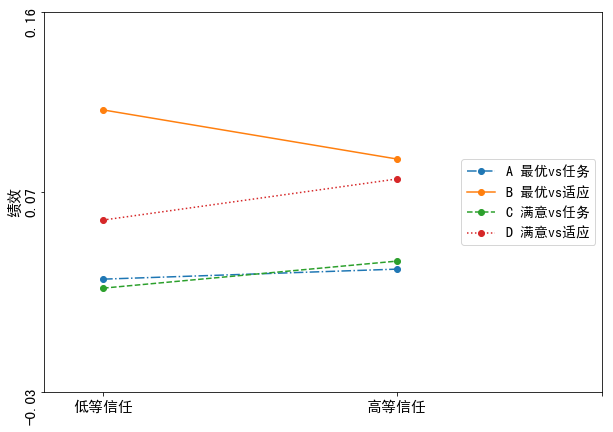

In [11]:
# 3. sarsa的协作绩效
# 最优任务 最优适应 满意任务 满意适应

# 低等信任环境
delta = 0.8
mean1 = []
for ita, w in zip([0.8, 0.8, 0.2, 0.2], [1, 0.5, 1, 0.5]):
    lst = get_task_counts(delta, ita, w, 's', 200)
    mean = get_mean_and_std(lst)[0]
    mean1.append(mean)

# 高等信任环境
delta = 0.2
mean2 = []
for ita, w in zip([0.8, 0.8, 0.2, 0.2], [1, 0.5, 1, 0.5]):
    lst = get_task_counts(delta, ita, w, 's', 200)
    mean = get_mean_and_std(lst)[0]
    mean2.append(mean)

_1 = np.vstack([[0.2]*4, mean1]).T
_2 = np.vstack([[1.2]*4, mean2]).T
a = np.hstack([_1, _2]).reshape((4,2,2))
mi = min(mean1+mean2)
ma = max(mean1+mean2)
plot_task_count(a, mi, ma)



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:05,  1.56it/s]

 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

 40%|████      | 4/10 [00:02<00:03,  1.54it/s]

 50%|█████     | 5/10 [00:03<00:03,  1.51it/s]

 60%|██████    | 6/10 [00:03<00:02,  1.50it/s]

 70%|███████   | 7/10 [00:04<00:01,  1.51it/s]

 80%|████████  | 8/10 [00:05<00:01,  1.54it/s]

 90%|█████████ | 9/10 [00:05<00:00,  1.55it/s]

100%|██████████| 10/10 [00:06<00:00,  1.52it/s]



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:03,  2.32it/s]

 20%|██        | 2/10 [00:00<00:03,  2.30it/s]

 30%|███       | 3/10 [00:01<00:03,  2.07it/s]

 40%|████      | 4/10 [00:02<00:03,  1.68it/s]

 50%|█████     | 5/10 [00:02<00:02,  1.76it/s]

 60%|██████    | 6/10 [00:03<00:02,  1.78it/s]

 70%|███████   | 7/10 [00:03<00:01,  1.90it/s]

 80%|████████  | 8/10 [00:04<00:01,  1.96it/s]

 90%|█████████ | 9/10 [00:04<00:00,  2.04it/s]

100

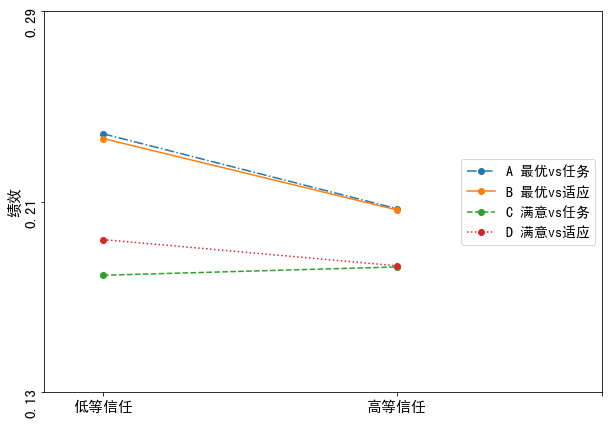

In [13]:
# 5. 策略迭代
# 最优任务 最优适应 满意任务 满意适应

# 低等信任环境
delta = 0.8
mean1 = []
for ita, w in zip([0.8, 0.8, 0.2, 0.2], [0.9, 0.5, 0.9, 0.5]):
    lst = get_task_counts(delta, ita, w, 'p', 200)
    mean = get_mean_and_std(lst)[0]
    mean1.append(mean)

# 高等信任环境
delta = 0.2
mean2 = []
for ita, w in zip([0.8, 0.8, 0.2, 0.2], [0.9, 0.5, 0.9, 0.5]):
    lst = get_task_counts(delta, ita, w, 'p', 200)
    mean = get_mean_and_std(lst)[0]
    mean2.append(mean)

_1 = np.vstack([[0.2]*4, mean1]).T
_2 = np.vstack([[1.2]*4, mean2]).T
a = np.hstack([_1, _2]).reshape((4,2,2))
mi = min(mean1+mean2)
ma = max(mean1+mean2)
plot_task_count(a, mi, ma)